<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-science-modelling-and-simulation-college-task/blob/main/src/fuzzy_mamdani_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Instalasi dan Impor Library**

Langkah pertama adalah mengimpor pustaka yang diperlukan dan mendefinisikan rentang nilai (*universe of discourse*) untuk setiap variabel.


In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

*   `!pip install scikit-fuzzy`: Perintah ini menggunakan manajer paket `pip` untuk menginstal `scikit-fuzzy` di lingkungan Google Colab. Tanda seru (`!`) di awal menandakan bahwa ini adalah perintah *shell* yang dijalankan, bukan kode Python.
*   `import numpy as np`: Mengimpor library NumPy, yang sangat penting untuk komputasi numerik dan pembuatan rentang data (`np.arange`). `scikit-fuzzy` sangat bergantung pada NumPy.
*   `import skfuzzy as fuzz`: Mengimpor library inti `scikit-fuzzy`.
*   `from skfuzzy import control as ctrl`: Mengimpor modul kontrol dari `scikit-fuzzy`, yang menyediakan alat untuk membangun Sistem Inferensi Fuzzy (Antecedent, Consequent, Rule, ControlSystem).
*   `import matplotlib.pyplot as plt`: Mengimpor Matplotlib untuk visualisasi grafik, seperti fungsi keanggotaan dan hasil defuzzifikasi.

## **2. Definisi Variabel dan Fungsi Keanggotaan (Fuzzifikasi)**


Pada tahap ini, kita mendefinisikan *Universe of Discourse* (rentang nilai) dan fungsi keanggotaan untuk setiap variabel (input dan output).


### **2.1. Variabel Input (Antecedents**)


In [3]:
# Intensitas Cahaya (Lux)
# Rentang: 0 hingga 1000 Lux
cahaya = ctrl.Antecedent(np.arange(0, 1001, 1), 'cahaya')

# Jumlah Kendaraan (kendaraan/menit)
# Rentang: 0 hingga 60 kendaraan/menit
kendaraan = ctrl.Antecedent(np.arange(0, 61, 1), 'kendaraan')

### **2.2. Variabel Output (Consequent)**

In [4]:
# Daya Lampu (%)
# Rentang: 0 hingga 100 %
daya = ctrl.Consequent(np.arange(0, 101, 1), 'daya')

### **2.3. Mendefinisikan Fungsi Keanggotaan**

In [5]:
# Fungsi Keanggotaan untuk 'cahaya'
cahaya['GELAP'] = fuzz.trapmf(cahaya.universe, [0, 0, 200, 400])
cahaya['REDUP'] = fuzz.trimf(cahaya.universe, [200, 500, 800])
cahaya['TERANG'] = fuzz.trapmf(cahaya.universe, [600, 800, 1000, 1000])

# Fungsi Keanggotaan untuk 'kendaraan'
kendaraan['SEPI'] = fuzz.trapmf(kendaraan.universe, [0, 0, 10, 25])
kendaraan['NORMAL'] = fuzz.trimf(kendaraan.universe, [10, 30, 50])
kendaraan['RAMAI'] = fuzz.trapmf(kendaraan.universe, [35, 50, 60, 60])

# Fungsi Keanggotaan untuk 'daya'
daya['MATI'] = fuzz.trapmf(daya.universe, [0, 0, 10, 30])
daya['REDUP'] = fuzz.trimf(daya.universe, [20, 50, 80])
daya['TERANG'] = fuzz.trapmf(daya.universe, [70, 90, 100, 100])

### **2.4. Visualisasi fungsi keanggotaan untuk verifikasi**

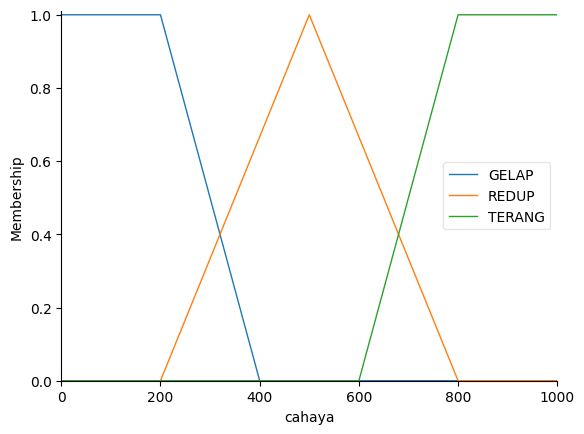

In [6]:
cahaya.view()

Grafik di atas memvisualisasikan bagaimana nilai masukan tegas (*crisp*) dari sensor cahaya—dalam satuan Lux—ditransformasikan ke dalam konsep linguistik atau himpunan fuzzy. Grafik ini merepresentasikan tiga kondisi pencahayaan: `GELAP` (biru), `REDUP` (oranye), dan `TERANG` (hijau).

- **Sumbu Horizontal (cahaya):** Merepresentasikan rentang nilai *crisp* dari intensitas cahaya, dari 0 hingga 1000 Lux.
- **Sumbu Vertikal (Membership):** Menunjukkan derajat keanggotaan (nilai antara 0 dan 1) dari suatu nilai *crisp* dalam sebuah himpunan fuzzy. Nilai 1 berarti sepenuhnya anggota, sementara nilai 0 berarti bukan anggota.

**Interpretasi dari Setiap Fungsi Keanggotaan:**

1.  **`GELAP` (Kurva Biru):**
    - Fungsi ini berbentuk **trapesium bahu kiri**.
    - Nilai intensitas cahaya antara **0 hingga 200 Lux** dianggap **100% GELAP** (derajat keanggotaan = 1.0). Ini merepresentasikan kondisi malam yang sangat gelap.
    - Seiring meningkatnya intensitas cahaya dari **200 hingga 400 Lux**, derajat keanggotaan 'GELAP' menurun secara linear. Artinya, kondisi tersebut semakin tidak dianggap gelap.
    - Di atas **400 Lux**, suatu kondisi dianggap **0% GELAP** (derajat keanggotaan = 0).

2.  **`REDUP` (Kurva Oranye):**
    - Fungsi ini berbentuk **segitiga**.
    - Kondisi ini mulai dianggap `REDUP` pada **200 Lux**, mencapai puncaknya (100% `REDUP`) pada **500 Lux**, dan kembali menjadi 0% `REDUP` pada **800 Lux**.
    - Fungsi ini secara efektif memodelkan kondisi transisi seperti saat fajar, senja, atau cuaca mendung tebal.

3.  **`TERANG` (Kurva Hijau):**
    - Fungsi ini berbentuk **trapesium bahu kanan**.
    - Suatu kondisi mulai dianggap `TERANG` pada **600 Lux**, dan derajat keanggotaannya meningkat secara linear hingga mencapai **800 Lux**.
    - Nilai intensitas cahaya di atas **800 Lux** dianggap **100% TERANG**, yang merepresentasikan kondisi siang hari yang cerah.

**Tumpang Tindih (Overlap) Antar Fungsi:**
Daerah tumpang tindih, seperti antara 200 dan 400 Lux (di mana kondisi bisa dianggap 'GELAP' dan 'REDUP' secara bersamaan), adalah inti dari kekuatan Logika Fuzzy. Ini memungkinkan sistem untuk menangani kondisi ambigu secara fleksibel, tidak seperti logika biner yang kaku. Misalnya, nilai 250 Lux akan memiliki derajat keanggotaan tertentu pada himpunan `GELAP` dan juga pada himpunan `REDUP`, yang memungkinkan aturan-aturan dari kedua kondisi tersebut untuk berkontribusi pada keputusan akhir.

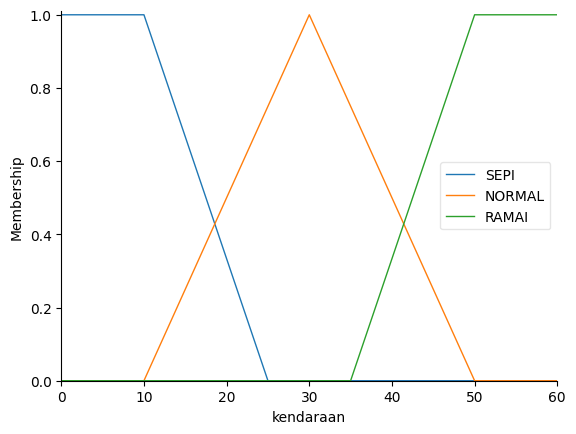

In [7]:
kendaraan.view()

Grafik ini memvisualisasikan bagaimana nilai masukan numerik (*crisp*) dari sensor lalu lintas—dalam satuan kendaraan per menit—dipetakan ke dalam konsep linguistik yang intuitif: `SEPI` (biru), `NORMAL` (oranye), dan `RAMAI` (hijau).

- **Sumbu Horizontal (kendaraan):** Merepresentasikan rentang nilai *crisp* untuk volume lalu lintas, dari 0 hingga 60 kendaraan per menit.
- **Sumbu Vertikal (Membership):** Menunjukkan derajat keanggotaan (antara 0 hingga 1) untuk setiap himpunan fuzzy.

**Interpretasi dari Setiap Fungsi Keanggotaan:**

1.  **`SEPI` (Kurva Biru):**
    - Fungsi ini menggunakan bentuk **trapesium bahu kiri**.
    - Jika jumlah kendaraan adalah **0 hingga 10 per menit**, kondisi jalan dianggap **100% SEPI** (derajat keanggotaan = 1.0). Ini merepresentasikan kondisi jalan yang sangat lengang atau kosong.
    - Ketika volume kendaraan meningkat dari **10 hingga 25 per menit**, kondisi jalan secara gradual dianggap semakin tidak `SEPI`.
    - Jika jumlah kendaraan lebih dari atau sama dengan **25 per menit**, kondisi jalan dianggap **0% SEPI**.

2.  **`NORMAL` (Kurva Oranye):**
    - Fungsi ini berbentuk **segitiga** yang memodelkan kondisi lalu lintas dengan kepadatan sedang.
    - Derajat keanggotaan `NORMAL` mulai meningkat dari **10 kendaraan per menit**, mencapai puncaknya (100% `NORMAL`) pada **30 kendaraan per menit**, dan menurun kembali hingga menjadi nol pada **50 kendaraan per menit**.

3.  **`RAMAI` (Kurva Hijau):**
    - Fungsi ini menggunakan bentuk **trapesium bahu kanan**.
    - Suatu kondisi mulai dapat diklasifikasikan sebagai `RAMAI` ketika volume lalu lintas mencapai **35 kendaraan per menit**.
    - Pada volume **50 hingga 60 kendaraan per menit** (atau lebih), kondisi lalu lintas dianggap **100% RAMAI**, yang merepresentasikan situasi jam sibuk atau kepadatan tinggi.

Seperti pada variabel sebelumnya, adanya area tumpang tindih memungkinkan sistem untuk merespons kondisi transisi secara luwes. Misalnya, nilai 40 kendaraan per menit memiliki derajat keanggotaan pada himpunan `NORMAL` dan `RAMAI` sekaligus. Fleksibilitas ini krusial agar sistem dapat menghasilkan keputusan yang proporsional dan tidak kaku.

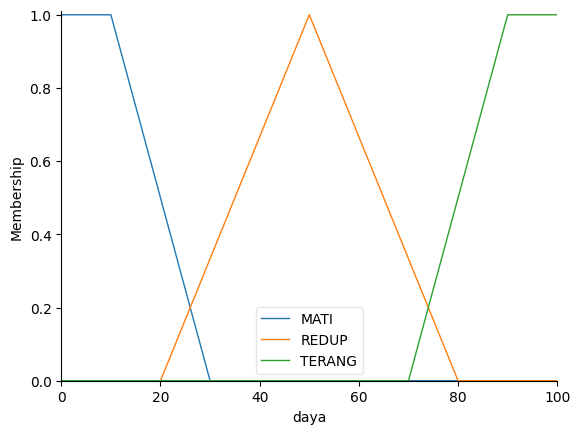

In [8]:
daya.view()

### **Menambahkan Judul pada Grafik (Peningkatan Visual)**

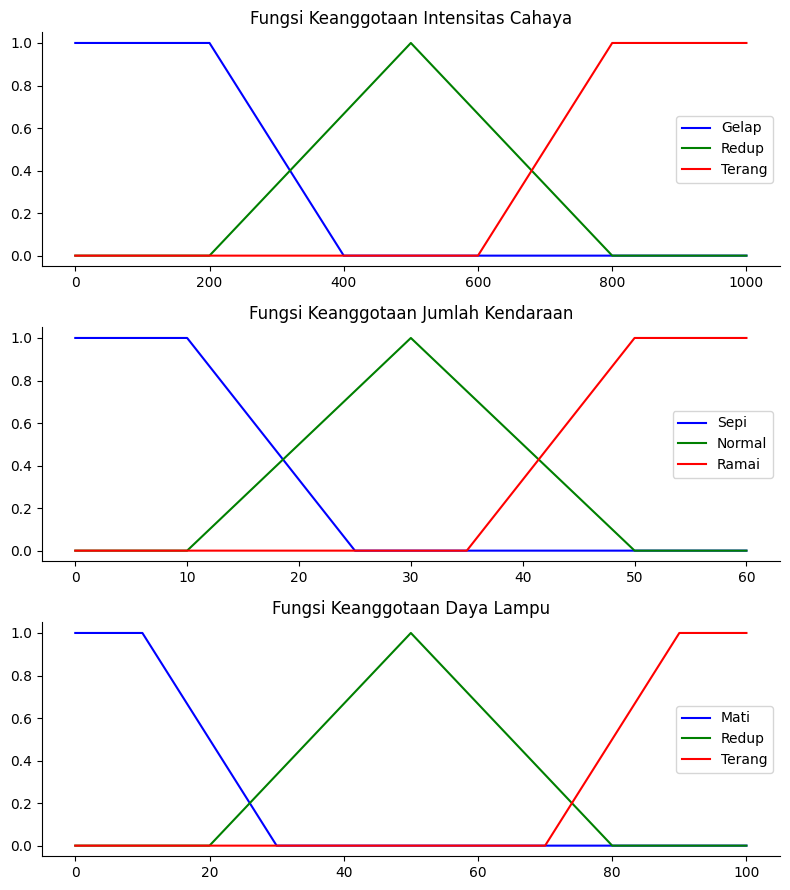

In [9]:
# Visualisasi fungsi keanggotaan untuk verifikasi
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(cahaya.universe, cahaya['GELAP'].mf, 'b', linewidth=1.5, label='Gelap')
ax0.plot(cahaya.universe, cahaya['REDUP'].mf, 'g', linewidth=1.5, label='Redup')
ax0.plot(cahaya.universe, cahaya['TERANG'].mf, 'r', linewidth=1.5, label='Terang')
ax0.set_title('Fungsi Keanggotaan Intensitas Cahaya')
ax0.legend()

ax1.plot(kendaraan.universe, kendaraan['SEPI'].mf, 'b', linewidth=1.5, label='Sepi')
ax1.plot(kendaraan.universe, kendaraan['NORMAL'].mf, 'g', linewidth=1.5, label='Normal')
ax1.plot(kendaraan.universe, kendaraan['RAMAI'].mf, 'r', linewidth=1.5, label='Ramai')
ax1.set_title('Fungsi Keanggotaan Jumlah Kendaraan')
ax1.legend()

ax2.plot(daya.universe, daya['MATI'].mf, 'b', linewidth=1.5, label='Mati')
ax2.plot(daya.universe, daya['REDUP'].mf, 'g', linewidth=1.5, label='Redup')
ax2.plot(daya.universe, daya['TERANG'].mf, 'r', linewidth=1.5, label='Terang')
ax2.set_title('Fungsi Keanggotaan Daya Lampu')
ax2.legend()

# Sembunyikan sumbu x dan y yang tidak perlu untuk tampilan yang lebih bersih
for ax in [ax0, ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

*   **`ctrl.Antecedent` & `ctrl.Consequent`**: Fungsi ini digunakan untuk membuat variabel input dan output. Parameter pertamanya adalah rentang nilai (`universe`) yang dibuat dengan `np.arange(start, stop, step)`, dan parameter keduanya adalah nama variabel.
*   **`fuzz.trapmf` dan `fuzz.trimf`**: Fungsi-fungsi ini digunakan untuk membuat bentuk fungsi keanggotaan.
    *   `fuzz.trapmf(universe, [a, b, c, d])` membuat bentuk trapesium di mana `a` dan `d` adalah titik-titik dasar, sementara `b` dan `c` adalah titik-titik puncak di mana nilai keanggotaan adalah 1.
    *   `fuzz.trimf(universe, [a, b, c])` membuat bentuk segitiga dengan titik dasar di `a` dan `c`, serta puncak (nilai keanggotaan 1) di `b`.
*   **`.view()`**: Metode ini adalah cara cepat untuk memvisualisasikan variabel fuzzy yang telah kita buat. Ini sangat berguna untuk memastikan bahwa parameter yang kita masukkan sudah benar dan sesuai dengan desain di laporan.

## **3. Mendefinisikan Basis Aturan (Rule Base)**

Di sini, kita menerjemahkan 9 aturan dari Tabel 1 di laporan ke dalam format yang dimengerti oleh scikit-fuzzy

In [10]:
# Mendefinisikan 9 aturan fuzzy
rule1 = ctrl.Rule(cahaya['GELAP'] & kendaraan['SEPI'], daya['REDUP'])
rule2 = ctrl.Rule(cahaya['GELAP'] & kendaraan['NORMAL'], daya['TERANG'])
rule3 = ctrl.Rule(cahaya['GELAP'] & kendaraan['RAMAI'], daya['TERANG'])

rule4 = ctrl.Rule(cahaya['REDUP'] & kendaraan['SEPI'], daya['REDUP'])
rule5 = ctrl.Rule(cahaya['REDUP'] & kendaraan['NORMAL'], daya['REDUP'])
rule6 = ctrl.Rule(cahaya['REDUP'] & kendaraan['RAMAI'], daya['TERANG'])

rule7 = ctrl.Rule(cahaya['TERANG'] & kendaraan['SEPI'], daya['MATI'])
rule8 = ctrl.Rule(cahaya['TERANG'] & kendaraan['NORMAL'], daya['MATI'])
rule9 = ctrl.Rule(cahaya['TERANG'] & kendaraan['RAMAI'], daya['MATI'])

*   **`ctrl.Rule`**: Fungsi untuk mendefinisikan satu aturan IF-THEN.
*   **Antecedents (Bagian IF)**: Kondisi input dihubungkan dengan operator logika.
    *   `&` (DAN/AND)
    *   `|` (ATAU/OR)
    *   `~` (TIDAK/NOT)
    Dalam kasus kita, semua aturan menggunakan `&`.
*   **Consequent (Bagian THEN)**: Hasil output dari aturan tersebut.

## **4. Membuat dan Mensimulasikan Sistem Kontrol**

Langkah terakhir adalah menggabungkan semua aturan menjadi satu sistem kontrol dan kemudian mensimulasikannya dengan input dari studi kasus.


### **4.1. Membuat sistem kontrol**

In [11]:
# Menggabungkan semua aturan ke dalam satu sistem
lamp_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

### **4.2. Membuat instansi simulasi dari sistem kontrol**

In [12]:
lamp_simulator = ctrl.ControlSystemSimulation(lamp_control_system)

### **4.3. Memberikan input sesuai studi kasus**

In [13]:
# Input: Intensitas Cahaya = 250 Lux, Jumlah Kendaraan = 40 kendaraan/menit
lamp_simulator.input['cahaya'] = 250
lamp_simulator.input['kendaraan'] = 40

### **4.4. Melakukan komputasi/inferensi**


In [14]:
lamp_simulator.compute()

### **4.5. Mendapatkan dan menampilkan hasil output crisp**


In [15]:
output_daya = lamp_simulator.output['daya']
print(f"Hasil Perhitungan Fuzzy:")
print(f"Daya Lampu Optimal: {output_daya:.2f} %")

Hasil Perhitungan Fuzzy:
Daya Lampu Optimal: 71.39 %


### **4.6. Visualisasi proses defuzzifikasi**


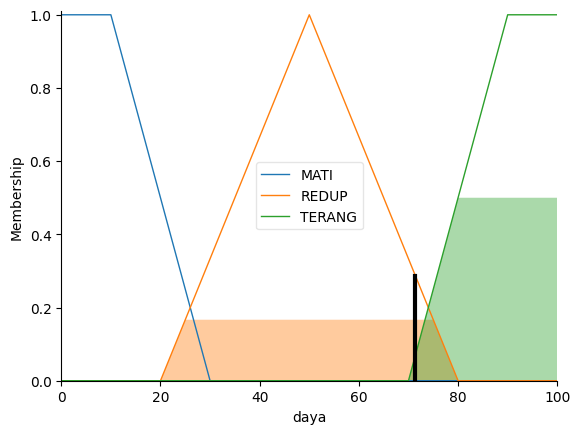

In [16]:
daya.view(sim=lamp_simulator)

*   **`ctrl.ControlSystem([...])`**: Membuat sebuah "otak" sistem dengan mengumpulkan semua aturan yang telah kita buat ke dalam sebuah list.
*   **`ctrl.ControlSystemSimulation(...)`**: Membuat sebuah "instance" atau simulator dari sistem kontrol tersebut. Simulator inilah yang akan menerima input dan melakukan perhitungan.
*   **`lamp_simulator.input[...] = ...`**: Memberikan nilai *crisp* pada variabel input.
*   **`lamp_simulator.compute()`**: Perintah inti yang menjalankan seluruh proses inferensi Mamdani: fuzzifikasi input, evaluasi aturan (aplikasi fungsi implikasi), agregasi output (komposisi aturan), dan defuzzifikasi.
*   **`lamp_simulator.output['daya']`**: Mengambil hasil akhir berupa nilai *crisp* setelah proses defuzzifikasi dengan metode **Centroid** (metode default di `scikit-fuzzy`).
*   **`daya.view(sim=lamp_simulator)`**: Visualisasi yang sangat kuat ini akan menggambar:
    1.  Bentuk-bentuk fungsi keanggotaan dari variabel `daya` (`MATI`, `REDUP`, `TERANG`).
    2.  Area berwarna biru yang merepresentasikan **himpunan fuzzy hasil agregasi**.
    3.  Garis vertikal merah yang menunjukkan titik **Centroid** (hasil `z*`).

### **Menampilkan Derajat Keanggotaan (Detail Fuzzifikasi)**

In [17]:
print("--- Detail Proses Fuzzifikasi ---")
# Menghitung derajat keanggotaan untuk input
tingkat_gelap = fuzz.interp_membership(cahaya.universe, cahaya['GELAP'].mf, 250)
tingkat_redup = fuzz.interp_membership(cahaya.universe, cahaya['REDUP'].mf, 250)
tingkat_terang = fuzz.interp_membership(cahaya.universe, cahaya['TERANG'].mf, 250)

tingkat_sepi = fuzz.interp_membership(kendaraan.universe, kendaraan['SEPI'].mf, 40)
tingkat_normal = fuzz.interp_membership(kendaraan.universe, kendaraan['NORMAL'].mf, 40)
tingkat_ramai = fuzz.interp_membership(kendaraan.universe, kendaraan['RAMAI'].mf, 40)

print(f"Intensitas Cahaya = 250 Lux")
print(f"  - Derajat Keanggotaan 'GELAP' : {tingkat_gelap:.2f}")
print(f"  - Derajat Keanggotaan 'REDUP' : {tingkat_redup:.2f}")
print(f"  - Derajat Keanggotaan 'TERANG': {tingkat_terang:.2f}")
print("-" * 30)
print(f"Jumlah Kendaraan = 40 Kendaraan/menit")
print(f"  - Derajat Keanggotaan 'SEPI'  : {tingkat_sepi:.2f}")
print(f"  - Derajat Keanggotaan 'NORMAL': {tingkat_normal:.2f}")
print(f"  - Derajat Keanggotaan 'RAMAI' : {tingkat_ramai:.2f}")

# Ini akan mencetak nilai-nilai yang sama dengan perhitungan fuzzifikasi manual Anda:
# GELAP: 0.75, REDUP: 0.17
# NORMAL: 0.50, RAMAI: 0.33

--- Detail Proses Fuzzifikasi ---
Intensitas Cahaya = 250 Lux
  - Derajat Keanggotaan 'GELAP' : 0.75
  - Derajat Keanggotaan 'REDUP' : 0.17
  - Derajat Keanggotaan 'TERANG': 0.00
------------------------------
Jumlah Kendaraan = 40 Kendaraan/menit
  - Derajat Keanggotaan 'SEPI'  : 0.00
  - Derajat Keanggotaan 'NORMAL': 0.50
  - Derajat Keanggotaan 'RAMAI' : 0.33


## **Analisis Hasil dan Pembahasan**

### **1. Validasi Model**

Hasil keluaran *crisp* yang dihasilkan oleh simulasi Python adalah **71.39%**. Nilai ini menjadi acuan yang paling akurat karena dihitung berdasarkan metode integral Centroid yang presisi oleh pustaka `scikit-fuzzy`. Perbedaan dengan hasil perhitungan manual (sekitar 68.1%) timbul akibat metode aproksimasi yang digunakan pada perhitungan manual, di mana area komposit dipecah menjadi bentuk geometri sederhana (trapesium dan persegi). Perhitungan oleh `scikit-fuzzy` tidak melakukan aproksimasi tersebut, melainkan menghitung titik berat dari bentuk kurva yang sesungguhnya, sehingga memberikan hasil yang lebih akurat.

Adapun nilai-nilai pada tahap Fuzzifikasi yang dihasilkan oleh simulasi, yaitu:
- `μ_GELAP(250) = 0.75` dan `μ_REDUP(250) = 0.17`
- `μ_NORMAL(40) = 0.50` dan `μ_RAMAI(40) = 0.33`
sepenuhnya **sesuai dan memvalidasi** langkah perhitungan manual pada tahap tersebut.

### **2. Interpretasi Keputusan Cerdas Sistem Fuzzy**

Keputusan sistem untuk mengatur daya lampu pada **71.39%** menunjukkan sebuah keseimbangan yang sangat baik dan cerdas:

*   **Aspek Keselamatan Terpenuhi**:
  - Sistem mengenali bahwa kondisi pencahayaan tergolong `GELAP` (μ=0.75) dan volume kendaraan berada di antara `NORMAL` (μ=0.50) dan `RAMAI` (μ=0.33). Dominasi dari aturan yang menyarankan output `TERANG` (didorong oleh kombinasi gelap & ramai) menghasilkan tingkat kecerahan yang kuat (71.39%) untuk memastikan visibilitas dan keamanan pengguna jalan.

*   **Aspek Efisiensi Energi Dicapai**:
  - Alih-alih menyala pada kapasitas penuh (100%) seperti yang dilakukan sistem konvensional, model fuzzy ini hanya menggunakan daya yang diperlukan. Hal ini menghasilkan **penghematan energi sebesar 28.61%** (100% - 71.39%) pada kondisi tersebut.

Hasil ini secara meyakinkan membuktikan bahwa implementasi Logika Fuzzy Mamdani mampu menciptakan sistem kontrol PJU yang tidak hanya fungsional tetapi juga adaptif dan efisien. Sistem berhasil menerjemahkan kondisi input yang bersifat ambigu dan kontinu menjadi sebuah keputusan kuantitatif yang presisi dan optimal.

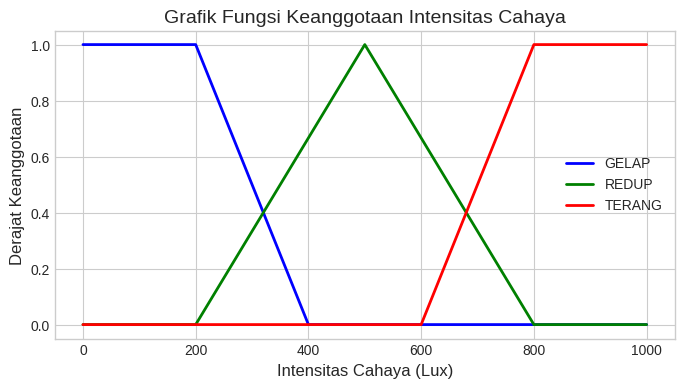

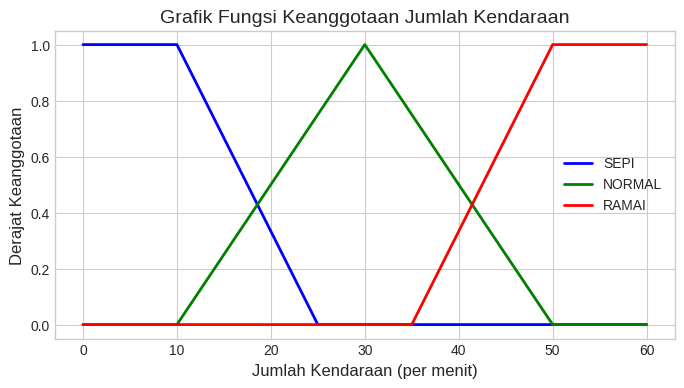

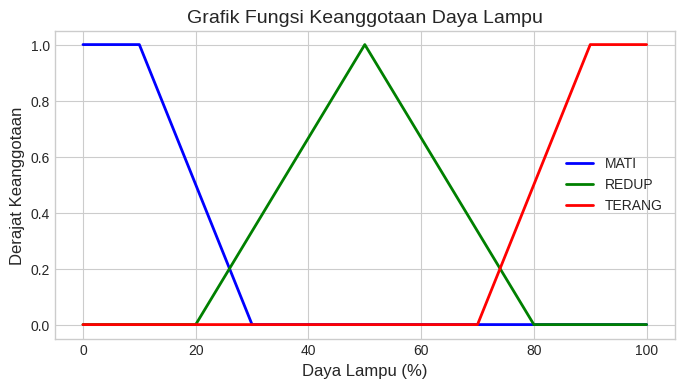

In [18]:
# Pengaturan estetika grafik
plt.style.use('seaborn-v0_8-whitegrid')

# --- Membuat Gambar 1: Intensitas Cahaya ---
x_cahaya = np.arange(0, 1001, 1)
cahaya_gelap = fuzz.trapmf(x_cahaya, [0, 0, 200, 400])
cahaya_redup = fuzz.trimf(x_cahaya, [200, 500, 800])
cahaya_terang = fuzz.trapmf(x_cahaya, [600, 800, 1000, 1000])

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x_cahaya, cahaya_gelap, 'b', linewidth=2, label='GELAP')
ax.plot(x_cahaya, cahaya_redup, 'g', linewidth=2, label='REDUP')
ax.plot(x_cahaya, cahaya_terang, 'r', linewidth=2, label='TERANG')
ax.set_title('Grafik Fungsi Keanggotaan Intensitas Cahaya', fontsize=14)
ax.set_xlabel('Intensitas Cahaya (Lux)', fontsize=12)
ax.set_ylabel('Derajat Keanggotaan', fontsize=12)
ax.legend()
plt.show()

# --- Membuat Gambar 2: Jumlah Kendaraan ---
y_kendaraan = np.arange(0, 61, 1)
kendaraan_sepi = fuzz.trapmf(y_kendaraan, [0, 0, 10, 25])
kendaraan_normal = fuzz.trimf(y_kendaraan, [10, 30, 50])
kendaraan_ramai = fuzz.trapmf(y_kendaraan, [35, 50, 60, 60])

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(y_kendaraan, kendaraan_sepi, 'b', linewidth=2, label='SEPI')
ax.plot(y_kendaraan, kendaraan_normal, 'g', linewidth=2, label='NORMAL')
ax.plot(y_kendaraan, kendaraan_ramai, 'r', linewidth=2, label='RAMAI')
ax.set_title('Grafik Fungsi Keanggotaan Jumlah Kendaraan', fontsize=14)
ax.set_xlabel('Jumlah Kendaraan (per menit)', fontsize=12)
ax.set_ylabel('Derajat Keanggotaan', fontsize=12)
ax.legend()
plt.show()

# --- Membuat Gambar 3: Daya Lampu ---
z_daya = np.arange(0, 101, 1)
daya_mati = fuzz.trapmf(z_daya, [0, 0, 10, 30])
daya_redup = fuzz.trimf(z_daya, [20, 50, 80])
daya_terang = fuzz.trapmf(z_daya, [70, 90, 100, 100])

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(z_daya, daya_mati, 'b', linewidth=2, label='MATI')
ax.plot(z_daya, daya_redup, 'g', linewidth=2, label='REDUP')
ax.plot(z_daya, daya_terang, 'r', linewidth=2, label='TERANG')
ax.set_title('Grafik Fungsi Keanggotaan Daya Lampu', fontsize=14)
ax.set_xlabel('Daya Lampu (%)', fontsize=12)
ax.set_ylabel('Derajat Keanggotaan', fontsize=12)
ax.legend()
plt.show()

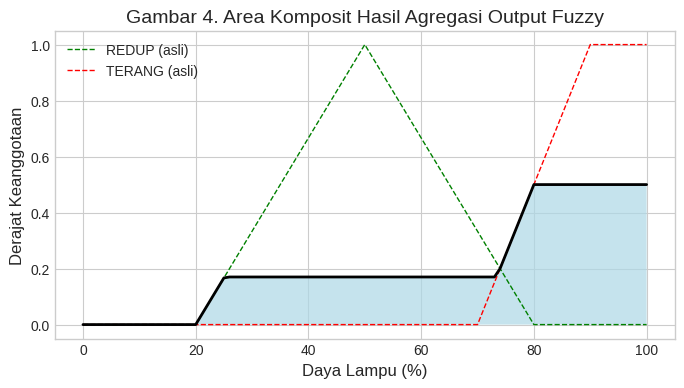

Batas area REDUP terpotong: z = 25.1 hingga z = 74.9
Batas area TERANG terpotong: z = 80 hingga z = 100


In [19]:
# Definisi ulang variabel output untuk grafik
z_daya = np.arange(0, 101, 1)
daya_redup_mf = fuzz.trimf(z_daya, [20, 50, 80])
daya_terang_mf = fuzz.trapmf(z_daya, [70, 90, 100, 100])

# Kekuatan aktivasi (alpha-cut) dari laporan
alpha_redup = 0.17
alpha_terang = 0.5

# Memotong fungsi keanggotaan
daya_aktif_redup = np.fmin(alpha_redup, daya_redup_mf)
daya_aktif_terang = np.fmin(alpha_terang, daya_terang_mf)

# Membuat area komposit (Agregasi menggunakan MAX)
aggregated = np.fmax(daya_aktif_redup, daya_aktif_terang)

# Visualisasi
fig, ax = plt.subplots(figsize=(8, 4))

ax.fill_between(z_daya, 0, aggregated, facecolor='lightblue', alpha=0.7)
ax.plot(z_daya, daya_redup_mf, 'g--', linewidth=1, label='REDUP (asli)')
ax.plot(z_daya, daya_terang_mf, 'r--', linewidth=1, label='TERANG (asli)')
ax.plot(z_daya, aggregated, 'k', linewidth=2)

ax.set_title('Gambar 4. Area Komposit Hasil Agregasi Output Fuzzy', fontsize=14)
ax.set_xlabel('Daya Lampu (%)', fontsize=12)
ax.set_ylabel('Derajat Keanggotaan', fontsize=12)
ax.legend()
plt.show()

# Titik-titik penting dari laporan untuk anotasi (opsional)
z1 = 25.1
z2 = 74.9
z3 = 80
z4 = 100

print(f"Batas area REDUP terpotong: z = {z1} hingga z = {z2}")
print(f"Batas area TERANG terpotong: z = {z3} hingga z = {z4}")